# Descarga de un soplo (b)


## Modelo 
Este modelo etermina la distancia que una nube debe recorrer  a  favor del viento para dispersarse a una concentración máxima deseada en ppm.



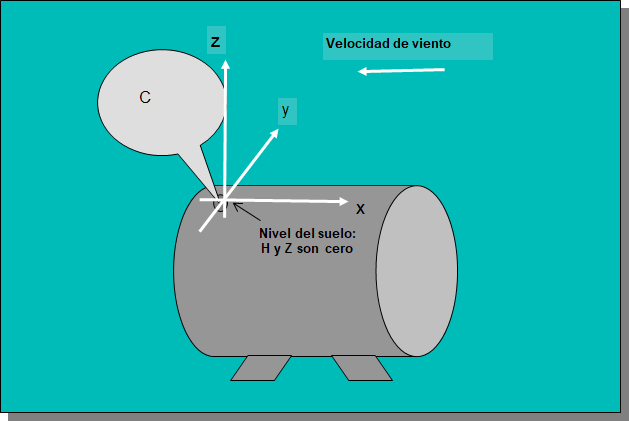

## Variables
|Variable|Significado|Unidades|
|------|------|------|
|G	|	Masa total de material liberado		|	kg/s|
|P	|	Presión		|atm|
|PM	|	Peso Molecular		|	kg/kgmol|
|T	|	Temperatura		|	K|
|C|		Concentación del material liberado		|	ppm|
|y|		Dirección transversal al viento 		|	m|
|z	|	Distancia por arriba del suelo		|	m|
|H|		Distancia a la que se esta liberando el material		|	m|
|u|		velocidad del viento|		m/s|



## Incógnitas


|Variable|Significado|Unidades|
|------|------|------|
|$\sigma$(x,y,z)	|	Coeficientes de dispersión en las direcciones x,y,z		|m|
|x|Distancia en dirección del viento||


### Consideraciones
-Seleccionar la clasae de estabilidad A, B, C, D, E, F

-Determina la concentración del material considerando a "x" distancia favor del viento, "y" distancia en contra o transversal del viento y  "z" distancia de altura del suelo. 

-Los coeficientes de distribución de  y & x son iguales, es decir $\sigma_x$ = $\sigma_y$

-La estabilidad atmosférica será F 






## Desarrollo y ecuaciones

El modelo de soplo (puff) describe una descarga instántanea de un gas. Este modelo depende de las condiciones atmosféricas (si), la altura de la descarga (z) y de la chimenea (H), la velocidad del viento (u).

- Ecuación 1.  ${C}(x,y,z,t)=\frac{G}{(2\pi)^{\frac{3}{2}}\sigma_x \sigma_y \sigma_z }exp[\frac{-1}{2}(\frac{y}{\sigma_y})^2]*(exp[\frac{-1}{2}(\frac{z-H}{\sigma_Z})^2]+exp[\frac{-1}{2}(\frac{z+H}{\sigma_Z})^2])$


como las condiciones para H, y, z son cero, la ecuación 1 se reduce a :

- Ecuación 2. ${C}(x,0,0)=\frac{G}{{(2\pi)}^{\frac{3}{2}}{\sigma_y}^2 \sigma_z }$





|Estabilidades Pasquill-Gifford|$\sigma_y$  ó $\sigma_x$ (m)|$\sigma_z$(m)|
|------|------|------|
	|A|		0.18x0.92|		0.60x0.75|	
	|B|		0.14x0.92	|	0.53x0.73|	
	|C|		0.10x0.92|		0.34x0.71|	
	|D|		0.06x0.92|		0.15x0.70|	
	|E|		0.04x0.92|		0.10x0.65|	
	|F|		0.02x0.92|		0.05x0.61|	




-A:Condiciones extremadamente inestables.

-B:Condiciones moderadamente inestables.

-C:Condiciones ligeramente inestables.

-D:Condiciones neutras.

-E:Condiciones estables.

-F:Condiciones muy estables.


Generalmente las concentraciones de contaminantes estan en PPM, por lo que siguiente ecuación nos  convierte unidades de  mg/^3  a PPM

- Ecuación 3.  $C_{ppm}=\frac{0.0826 L atm}{gmol K}(\frac{T}{PM*P})*C_{kg/m^3}*10^6$

## Resultados


In [4]:
#Datos
G=1 #kg/s
P= 1 #atm
PM=30 #kg/kmol
T= 298#k
C=0.5#ppm
y=0 #m
z=0 #m
H= 0 #m
u=2 #m/s



Para un estimado de x  utilizamos la siguiente ecuación considerando la estabilidad de F:

$(0.02x^{0.92})^2(0.05x^{0.61})=\sigma_y^2 \sigma_z$

Como ya hemos elegido las condiciones ambientales podemos plantear la sigiente ecuación

$\sigma_y^2 \sigma_z=2.07x10^5 m^3$

NOTA: esta ecuación varía según sea la clase de estabilidad ambiental(A,B,C,D,E,F)

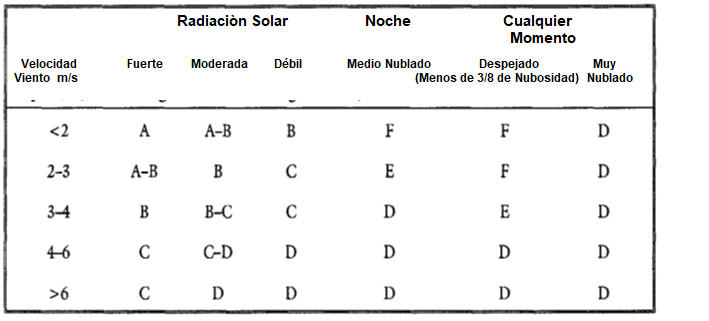

In [5]:
#fsolve
import numpy as np
from scipy.optimize import fsolve
def objetivo(x):
    a=(0.02*x**0.92)**2
    b=(0.05*x**0.61)

    return a*b-2.07*10**5
print("x= "+(str(fsolve(objetivo,100)))+" m")

x= [12238.57222131] m


In [7]:
x=float(fsolve(objetivo,100))

In [20]:
import numpy as np
import math
V=0.1#m/S
PasquillGifford=np.array(["A","B","C","D","E","F"])
Vi=np.array([0.1,0.1,2.0,3.0,2.0,2.0])

parametro_sigma_y=np.array([0.18,0.14,0.1,0.06,0.04,0.02])
sigma_y=parametro_sigma_y*x**0.92
parametro_sigma_z=np.array([0.6,0.53,0.34,0.15,0.1,0.05])
zElevacion=np.array([0.75,0.73,0.71,0.7,0.65,0.61])
sigma_z=parametro_sigma_z*x**zElevacion

C=G*( np.exp(-0.5*((z-H)/sigma_z)**2)+np.exp(-0.5*((z+H)/sigma_z)**2))
C2=((2*np.pi)**(1.5)*sigma_y*sigma_y*sigma_z)
C_ppm=0.08206*(C)*10**6*T/PM*P


print("Vi= "+ str(Vi)+"m/s")
print("Sy= "+str(sigma_y) +"m")
print("Sz= "+str(sigma_z) +"m")
print("C= "+str(C/C2) +"m")
print("C(ppm)= "+str(C_ppm) )





print('{:^10}''{:^10}''{:^10}''{:^10}''{:^10}'.format('Estabilidad',' V[m/s]','  sy[m] ','sz[m]','     C[kg/m3]'))
for i in range(len(PasquillGifford)):
    
    print('{:^10}''{:^10.1f}''{:^10.3f}''{:^10.3f}''{:^10}'.format(PasquillGifford[i],Vi[i],sigma_y[i],sigma_z[i],(C/C2)[i],C_ppm[i]))


Vi= [0.1 0.1 2.  3.  2.  2. ]m/s
Sy= [1037.49210302  806.93830235  576.38450168  345.83070101  230.55380067
  115.27690034]m
Sz= [698.1509232  510.88049356 271.49869917 109.01914899  45.39677387
  15.57706976]m
C= [1.68982323e-10 3.81733445e-10 1.40788717e-09 9.73935768e-09
 5.26248209e-08 6.13465081e-07]m
C(ppm)= [1630258.66666667 1630258.66666667 1630258.66666667 1630258.66666667
 1630258.66666667 1630258.66666667]
Estabilidad  V[m/s]     sy[m]    sz[m]        C[kg/m3]
    A        0.1     1037.492  698.151  1.6898232338064556e-10
    B        0.1     806.938   510.880  3.817334450900864e-10
    C        2.0     576.385   271.499  1.407887168514979e-09
    D        3.0     345.831   109.019  9.739357677191603e-09
    E        2.0     230.554    45.397  5.26248208614045e-08
    F        2.0     115.277    15.577  6.134650814902509e-07


Se debe variar el valor de x para obtener la concentación deseada, en este caso 0.5ppm con condiciones F